In [1]:
2+3

5

In [2]:
import torch

In [3]:
x=3.5
y=x*x+2
print(x,y)

3.5 14.25


In [4]:
#simple pytorch tensor

x=torch.tensor(3.5)
print(x)

tensor(3.5000)


In [5]:
#simple airthmatic with tensor

y=x+3
print(y)

tensor(6.5000)


In [6]:
#Automatic gradient with pytorch

x=torch.tensor(3.5,requires_grad=True)
print(x)

tensor(3.5000, requires_grad=True)


In [7]:
#y is defined as a function of x
y=(x-1)*(x-2)*(x-3)
print(y)

tensor(1.8750, grad_fn=<MulBackward0>)


In [8]:
#work out gradients
y.backward()

In [9]:
#what is the gradient at x=3.5
x.grad

tensor(5.7500)

In [10]:
#set the simple graph relating x,y,z

x=torch.tensor(3.5,requires_grad=True)
y=x*x
z=2*y+3

In [11]:
# work out gradients
z.backward()

In [12]:
x.grad

tensor(14.)

In [13]:
a=torch.tensor(2.0,requires_grad=True)

In [14]:
b=torch.tensor(1.0,requires_grad=True)

In [15]:
x=2*a+3*b
y=5*a*a+3*b*b
z=2*x+3*y

In [16]:
z.backward()

In [17]:
a.grad

tensor(64.)

In [18]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [19]:
import pandas

In [20]:
df=pandas.read_csv('mount/My Drive/colab notebooks/mnist_data/mnist_test.csv',header=None)

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


In [23]:
import matplotlib.pyplot as plt

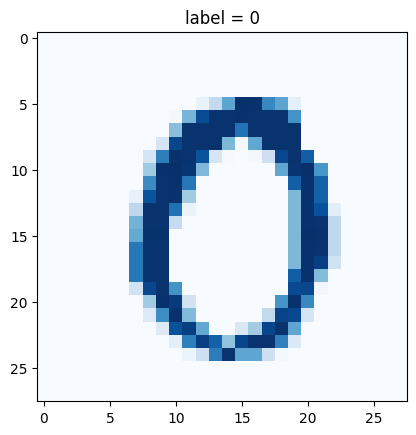

In [24]:
row=13

data=df.iloc[row]
label=data[0]
img=data[1:].values.reshape(28,28)
plt.title("label = " +str(label))
plt.imshow(img,interpolation='none',cmap='Blues')
plt.show()

In [25]:
import torch
import torch.nn as nn


In [91]:
# classifier class

class Classifier(nn.Module):

    def __init__(self):
        # initialise parent pytorch class
        super().__init__()

        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            #nn.Sigmoid(),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),

            nn.Linear(200, 10),
            #nn.Sigmoid()
            nn.LeakyReLU(0.02)
        )

        # create loss function
        self.loss_function = nn.MSELoss()
        #self.loss_function = nn.MSELoss()

        # create optimiser, using simple stochastic gradient descent
        self.optimiser = torch.optim.Adam(self.parameters())
        #self.optimiser = torch.optim.Adam(self.parameters())

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []

        pass


    def forward(self, inputs):
        # simply run model
        return self.model(inputs)


    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)

        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, and update the weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass


    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass

    pass

In [92]:
from torch.utils.data import Dataset


In [93]:
class MnistDataset(Dataset):
  def __init__(self,csv_file):
    self.data_df=pandas.read_csv(csv_file,header=None)
    pass

  def __len__(self):
    return len(self.data_df)

  def __getitem__(self,index):
    label=self.data_df.iloc[index,0]
    target=torch.zeros((10))
    target[label]=1.0

    image_values=torch.FloatTensor(self.data_df.iloc[index,1:].values)/255.0

    return label,image_values,target

  pass

  def plot_image(self,index):
    arr=self.data_df.iloc[index,1:].values.reshape(28,28)
    plt.title("label = " + str(self.data_df.iloc[index,0]))
    plt.imshow(arr,interpolation='none',cmap='Blues')
    pass



In [80]:
mnist_dataset=MnistDataset('mount/My Drive/colab notebooks/mnist_data/mnist_train.csv')

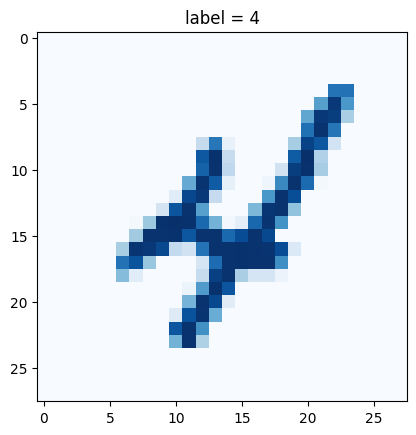

In [81]:
mnist_dataset.plot_image(9)

In [82]:
# Get a specific item (image, label) from the dataset
index = 0  # Index of the item you want to retrieve
label, image_values,target = mnist_dataset[index]

# Now you can use the image and label for further processing or analysis
print(image_values.shape)  # Shape of the image tensor
print(label)
print(target)        # Label tensor (e.g., one-hot encoded)


torch.Size([784])
5
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


In [83]:
C=Classifier()

for label,image_data_tensor,target_tensor in mnist_dataset:
  C.train(image_data_tensor,target_tensor)
  pass




KeyboardInterrupt: 

In [94]:
%%time

C=Classifier()

epochs=3

for i in range(epochs):
  print('training epoch', i+1,"of",epochs)
  for label,image_data_tensor,target_tensor in mnist_dataset:
    C.train(image_data_tensor,target_tensor)
    pass
  pass



training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 14min 11s, sys: 6.16 s, total: 14min 17s
Wall time: 14min 29s


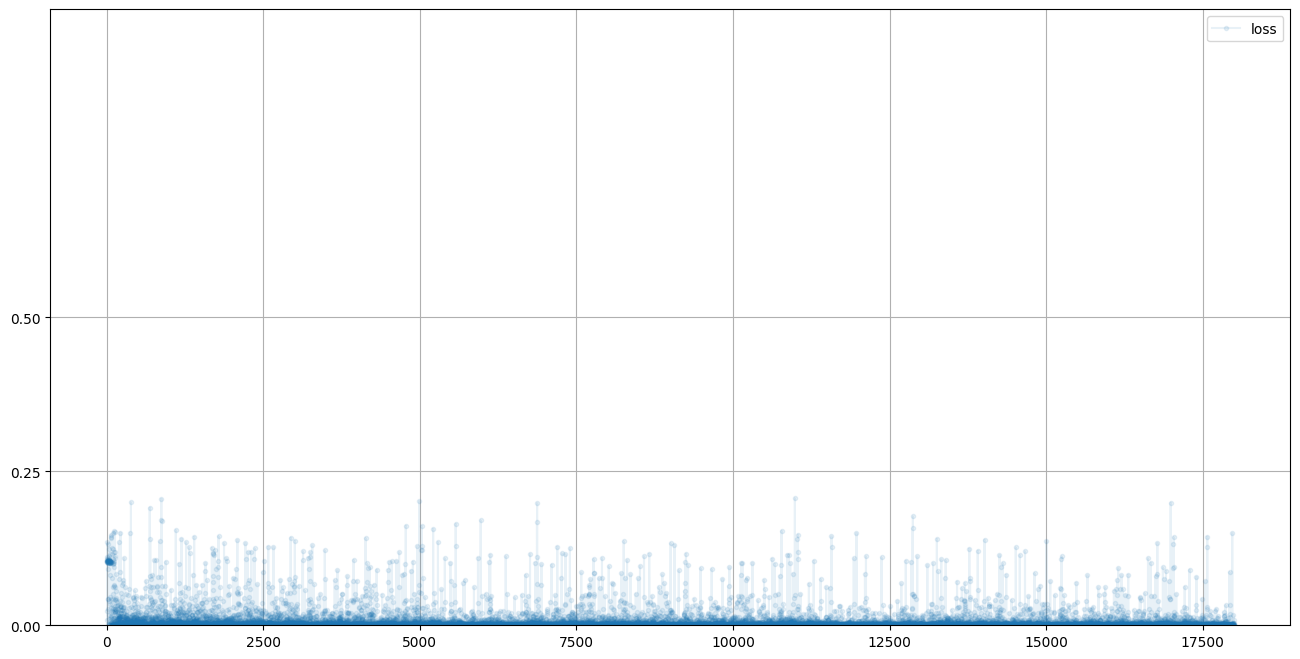

In [95]:
C.plot_progress()

In [49]:
mnist_test_dataset=MnistDataset('mount/My Drive/colab notebooks/mnist_data/mnist_test.csv')

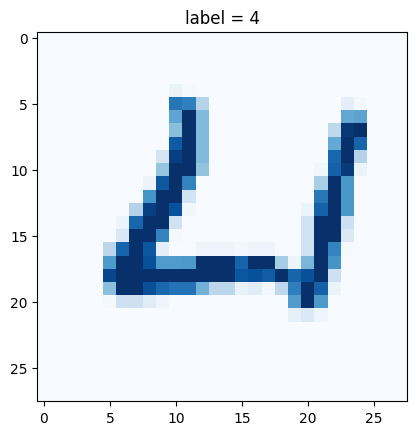

In [87]:
record=33

mnist_test_dataset.plot_image(record)

<Axes: >

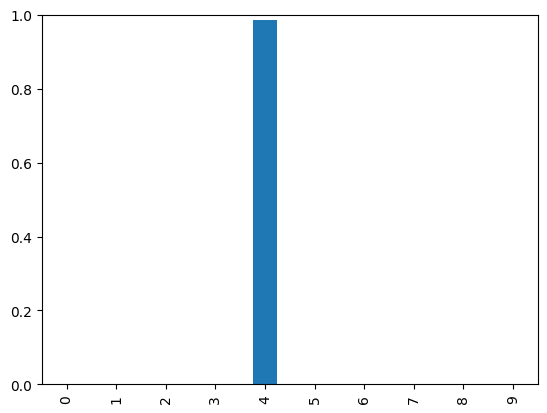

In [97]:
record=42
image_data=mnist_test_dataset[record][1]
output=C.forward(image_data)
pandas.DataFrame(output.detach().numpy()).plot(kind='bar',legend=False,ylim=(0,1))

In [52]:
image_data

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [54]:
mnist_test_dataset[19][1]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [96]:
score=0
items=0

for label,image_data_tensor,target_tensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  if (answer.argmax()==label):
    score+=1
    pass
  items+=1

  pass

print(score,items,score/items)

9738 10000 0.9738
